# Regression tree

Ce notebook est dédié à l'analyse des résultats obtenus avec un arbre de regression

Il fait appel au fichier python `regression_tree.py` qui définit le modèle, l'entraîne et prédit le jeu de test.


In [1]:
from regression_tree import main_regression_tree

In [2]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Run le modèle

In [6]:
np.arange(10,40,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

Meilleur score = 0.033574, Meilleur paramètre = {'max_depth': 36}
Temps execution en secondes pour l'optimization: 167.97405290400002
Temps execution en secondes pour l'entrainement': 7.796000318194274e-06
RMSE =  10.682470069176901
R2 =  0.9796764552494632
MAE =  5.910494403390332


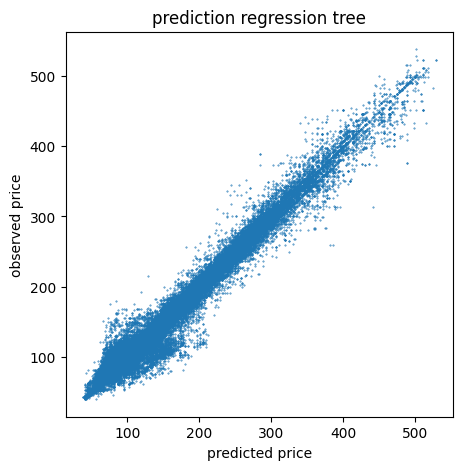

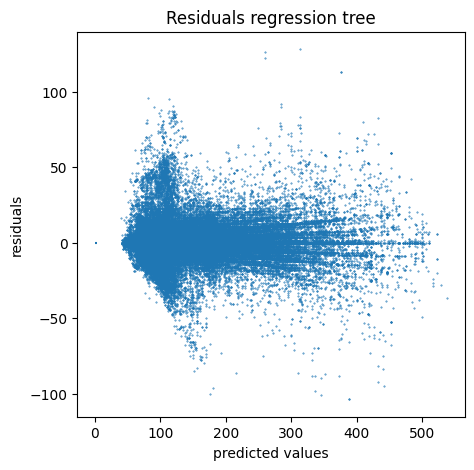

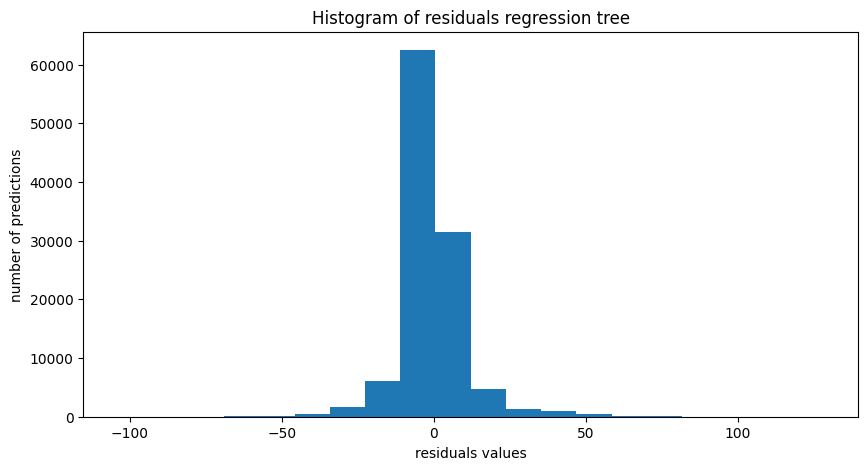

In [5]:
main_regression_tree(list_max_depth=np.arange(10,40,2))

# Analyse des résultats 

**Temps d'exécution :**
Temps execution en sec pour l'entrainement : 7.796000318194274e-06

**Paramètres optimaux et sélection de variables :**
- La paramètre optimal est $max\_depth = 36$, calculé par un grid search. 
- Les variables les plus importantes sont brand_target, city_target, language_target, date et stock_mod

**Score sur l'échantillon de validation :**
- RMSE =  10.682470069176901
- R2 =  0.9796764552494632
- MAE =  5.910494403390332

Les scores sont meilleurs que les résultats obtenus en regrssion. Le modèle fournit une bonne prédiction du set de validation. 

**Analyse des graphiques :**
- Graphe 1 - observations réelles contre les prédictions : Dans l'idéal, se graphique doit se rapprocher le plus possible de la droite identité. On constate bien la présence d'une droite se rapprochant de f(x)=x. Lorsque les prix sont bas (entre 0 et 200€), le modèle fait plus d'erreur que lorsque les prix sont élevés. 

- Graphe 2 - résidus contre les valeurs prédites : Ce graphe confirme l'observation précédente, quand le prix à prédire est bas, le modèle fait plus d'erreur. On conste une forme en entonnoir du nuage de points vers les prix bas. Dans l'idéal on devrait avoir une répartition uniforme des points, et que les points soient proches de l'axe 0. Les valeurs des résidus sont plus élevées que pour le modèle linéaire. 

- Graphe 3 - Histogramme des résidus : Ce graphe est utilisé pour voir la répartition des erreurs sur les prédictions. On constate que la majeure partie des erreurs se situent de dans l'intervalle [-25,25]. Par ailleurs, le plus haut pic se trouve juste avant 0, le modèle aurait donc tendance à surestimer le prix puisque les résidus sont définits par : $résidus = valeurs\_réelles - valeurs\_predites$.